In [1]:
import cv2
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

In [4]:
src_folder = "../plantnetSimplon/training_data_/raw"
train_folder = "../plantnetSimplon/training_data_/training"

In [5]:
# Create the output folder if it doesn't already exist
if os.path.exists(train_folder):
    shutil.rmtree(train_folder)

In [6]:
def remove_background(image_rgb, start_x=0, start_y=0, width=150, height=150):
    # Convert to RGB
#     image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Rectangle values: start x, start y, width, height
    rectangle = (start_x, start_y, width, height)
    # Create initial mask
    mask = np.zeros(image_rgb.shape[:2], np.uint8)

    # Create temporary arrays used by grabCut
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Run grabCut
    cv2.grabCut(image_rgb, # Our image
                mask, # The Mask
                rectangle, # Our rectangle
                bgdModel, # Temporary array for background
                fgdModel, # Temporary array for background
                5, # Number of iterations
                cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

    # Create mask where sure and likely backgrounds set to 0, otherwise 1
    mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

    # Multiply image with new mask to subtract background
    image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
    return image_rgb_nobg

In [7]:
# Loop through each subfolder in the input folder
for root, folders, files in os.walk(src_folder):
    for sub_folder in folders:
        print('processing folder ' + sub_folder)
        # Create a matching subfolder in the output dir
        save_folder = os.path.join(train_folder,sub_folder)
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)
        # Loop through the files in the subfolder
        file_names = os.listdir(os.path.join(root,sub_folder))
        for file_name in file_names:
            # Open the file
            file_path = os.path.join(root,sub_folder, file_name)
            # Create a gray version and save it
            image_rgb = cv2.imread(file_path)
            image_rgb_nobg = remove_background(image_rgb, 23, 23, 110, 125)
            save_as = os.path.join(save_folder, file_name)
            cv2.imwrite(save_as, image_rgb_nobg)

processing folder Cichorium_intybus_L
processing folder Leucanthemum_vulgare_(Vaill)_Lam
processing folder Malva_sylvestris_L
processing folder Papaver_rhoeas_L
processing folder Ranunculus_bulbosus_L


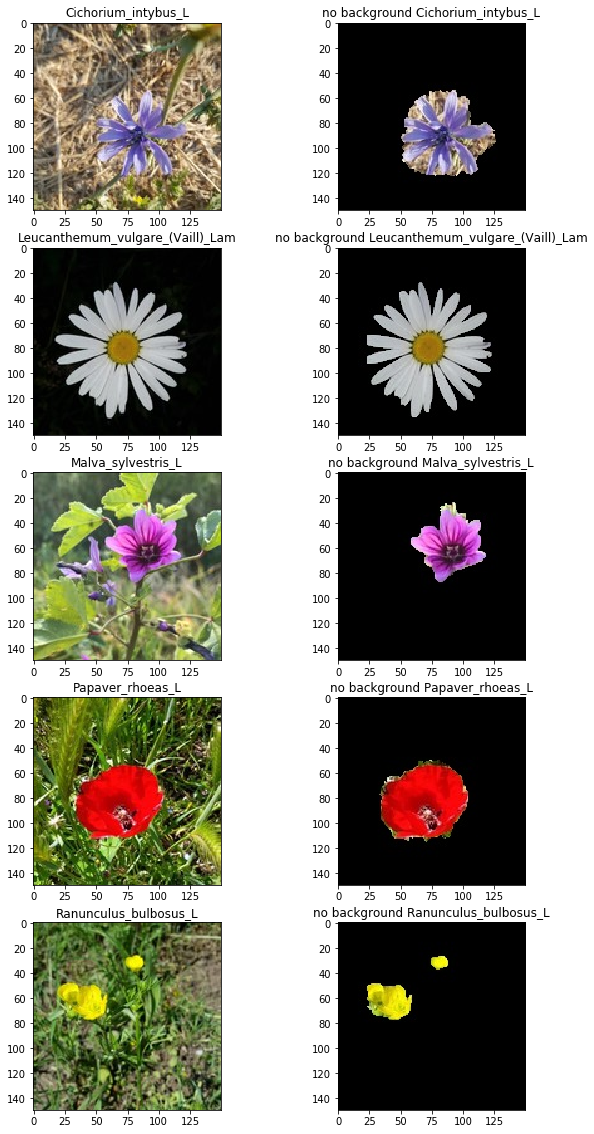

In [24]:
# Create a new figure
fig = plt.figure(figsize=(10,20))

# loop through the subfolders in the input directory
image_num = 0
for root, folders, filenames in os.walk(src_folder):
    for folder in folders:
        # Get an image in the subfolder and add it to a plot that has two columns and row for each folder
        file = os.listdir(os.path.join(root,folder))[3]
        src_file = os.path.join(src_folder,folder, file)
        src_image = cv2.imread(src_file)
        src_image = cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB)
        image_num += 1
        a=fig.add_subplot(len(folders), 2, image_num)
        imgplot = plt.imshow(src_image)
        a.set_title(folder)
        # The next image is the no background counterpart - load and plot it
        no_bg_file = os.path.join(train_folder,folder, file)
        no_bg_image = cv2.imread(no_bg_file)
        no_bg_image = cv2.cvtColor(no_bg_image, cv2.COLOR_BGR2RGB)
        image_num += 1
        b=fig.add_subplot(len(folders), 2, image_num)
        imgplot = plt.imshow(no_bg_image)
        b.set_title('no background ' + folder)